In [77]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#loading the dataset
df=pd.read_csv('/Users/User/Downloads/Placement_Data_Full_Class.csv')

In [79]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Specifying Columns
#### 1. sl_no - Serial Number
#### 2. gender - Male='M',Female='F'
#### 3. ssc_p - Secondary Education percentage- 10th Grade
#### 4. ssc_b - Board of Education- Central/ Others
#### 5. hsc_p - Higher Secondary Education percentage- 12th Grade
#### 6. hsc_b - Board of Education- Central/ Others
#### 7. hsc_s - Specialization in Higher Secondary Education
#### 8. degree_p - Degree Percentage
#### 9. degree_t - Under Graduation(Degree type)- Field of degree education
#### 10. workex - Work Experience
#### 11. etest_p - Employability test percentage ( conducted by college)
#### 12. specialisation - Post Graduation(MBA)- Specialization
#### 13. mba_p - MBA percentage
#### 14. status - Status of placement- Placed/Not placed
#### 15. salary - Salary offered by corporate to candidates

In [80]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### The `salary` column contains 67 empty rows.

## Data Cleaning

### Handling Missing Values

In [82]:
# Create two DataFrames: one with salary information and one without
with_salary = df[df['salary'].notna()]
without_salary = df[df['salary'].isna()]

# Count the number of entries in each DataFrame
num_with_salary = len(with_salary)
num_without_salary = len(without_salary)

print(f"Number of people with salary information: {num_with_salary}")
print(f"Number of people without salary information: {num_without_salary}")

Number of people with salary information: 148
Number of people without salary information: 67


#### It indicates this the empty rows in `salary` column are for that students which are not placed.
#### So, the empty rows are filled by '0'. 

In [83]:
df['salary']=df['salary'].fillna(0)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### `sl_no` column just provide the index of the rows which are not as much as useful as the other rows are. It is more preferable to drop this column.

In [85]:
df.drop(columns='sl_no', inplace=True)

In [86]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [87]:
def unique_values_counts(df): #defining a function
    unique_data={} #created a empty dictionary
    for column in df.columns:
        unique_values=df[column].unique()
        unique_count=df[column].nunique()
        unique_data[column]={'Unique Counts': unique_count,'Unique Values': unique_values}
    return unique_data

unique_data=unique_values_counts(df)
unique_data

{'gender': {'Unique Counts': 2,
  'Unique Values': array(['M', 'F'], dtype=object)},
 'ssc_p': {'Unique Counts': 103,
  'Unique Values': array([67.  , 79.33, 65.  , 56.  , 85.8 , 55.  , 46.  , 82.  , 73.  ,
         58.  , 69.6 , 47.  , 77.  , 62.  , 63.  , 60.  , 79.  , 69.8 ,
         77.4 , 76.5 , 52.58, 71.  , 76.76, 64.  , 61.  , 87.  , 69.  ,
         51.  , 81.  , 78.  , 74.  , 49.  , 76.  , 70.89, 50.  , 75.2 ,
         54.4 , 40.89, 80.  , 60.4 , 68.  , 52.6 , 84.2 , 86.5 , 54.  ,
         83.  , 80.92, 69.7 , 75.  , 84.86, 64.6 , 56.6 , 59.  , 66.5 ,
         84.  , 81.7 , 70.  , 83.84, 59.6 , 66.  , 85.  , 52.  , 60.23,
         70.5 , 45.  , 61.08, 69.5 , 73.96, 68.2 , 60.8 , 72.  , 80.4 ,
         76.7 , 74.9 , 77.44, 77.67, 89.4 , 44.  , 75.4 , 53.  , 51.57,
         55.6 , 74.2 , 67.16, 63.3 , 67.9 , 48.  , 59.96, 63.4 , 73.24,
         77.8 , 56.28, 88.  , 78.5 , 61.8 , 65.2 , 83.96, 54.2 , 55.68,
         41.  , 83.33, 43.  , 80.6 ])},
 'ssc_b': {'Unique Counts': 2,
  

C:\Users\User\AppData\Local\Temp\ipykernel_25920\3478535814.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Employability percentage')

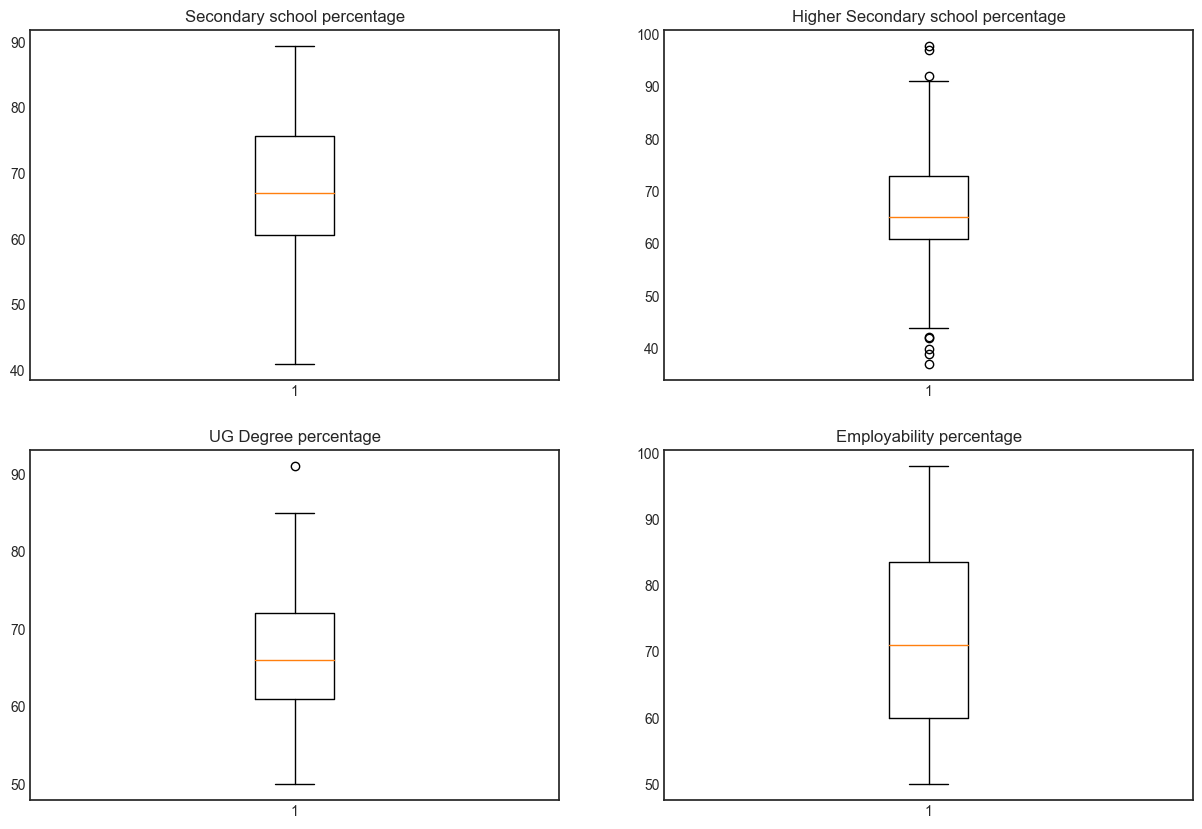

In [88]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability percentage')

In [89]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]

## Exploartory Data Analysis

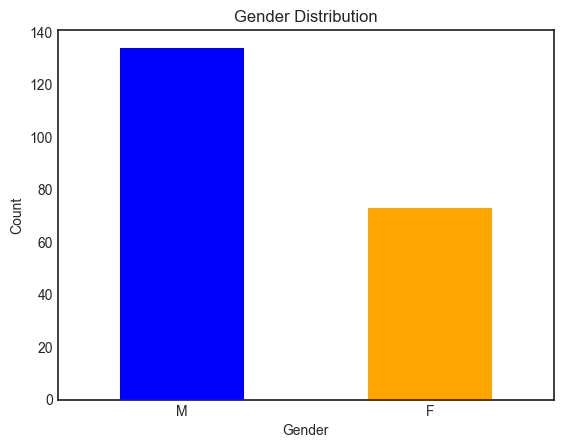

In [90]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Plot the bar chart
gender_counts.plot(kind='bar', color=['blue', 'orange'])

# Customize the plot
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate the labels if needed
plt.show()

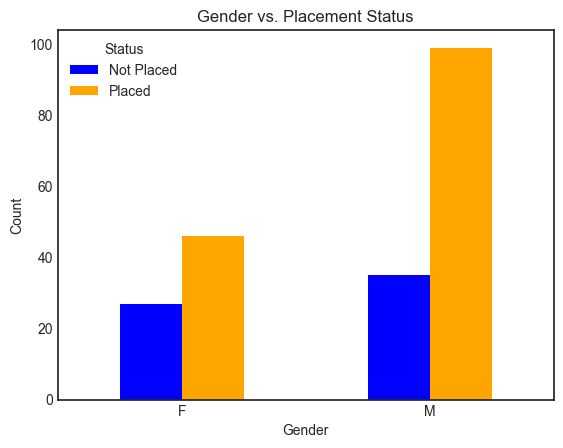

In [91]:
gender_status_counts = df.groupby(['gender', 'status']).size().unstack()
gender_status_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'])
plt.title('Gender vs. Placement Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.show()

#### Twice of males as compared to females are placed by the campus placement.

In [92]:
highest_package_by_gender = df.groupby('gender')['salary'].max()
print(highest_package_by_gender)

gender
F    400000.0
M    940000.0
Name: salary, dtype: float64


#### Higher packages has been given to males as compared to females.

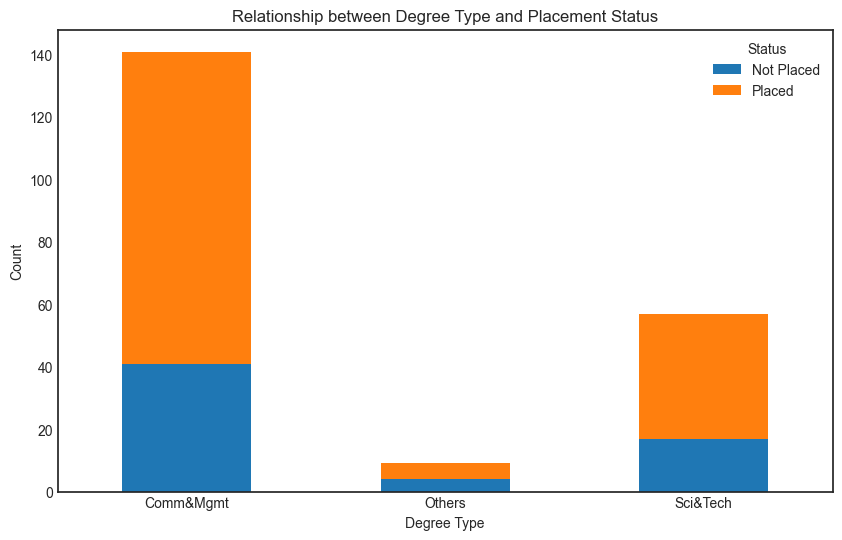

In [93]:
# Group by degree_t and status to get counts
grouped = df.groupby(['degree_t', 'status']).size().unstack()

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize plot
plt.title('Relationship between Degree Type and Placement Status')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')

plt.show()

In [94]:
# Group by degree_t and status to get counts
grouped = df.groupby(['degree_t', 'status']).size().unstack().fillna(0).astype(int)

# Add totals row and column
grouped.loc['Total'] = grouped.sum(axis=0)
grouped['Total'] = grouped.sum(axis=1)

# Display the table
print(grouped)

status     Not Placed  Placed  Total
degree_t                            
Comm&Mgmt          41     100    141
Others              4       5      9
Sci&Tech           17      40     57
Total              62     145    207


#### Overall, the placement success varies across different degree types, with `Comm&Mgmt` and `Sci&Tech` showing stronger placement outcomes compared to `Others`.
#### These insights can help in understanding the trends in placement rates based on the type of degree, which may be useful for academic advisors, career counselors, and students making educational and career decisions.

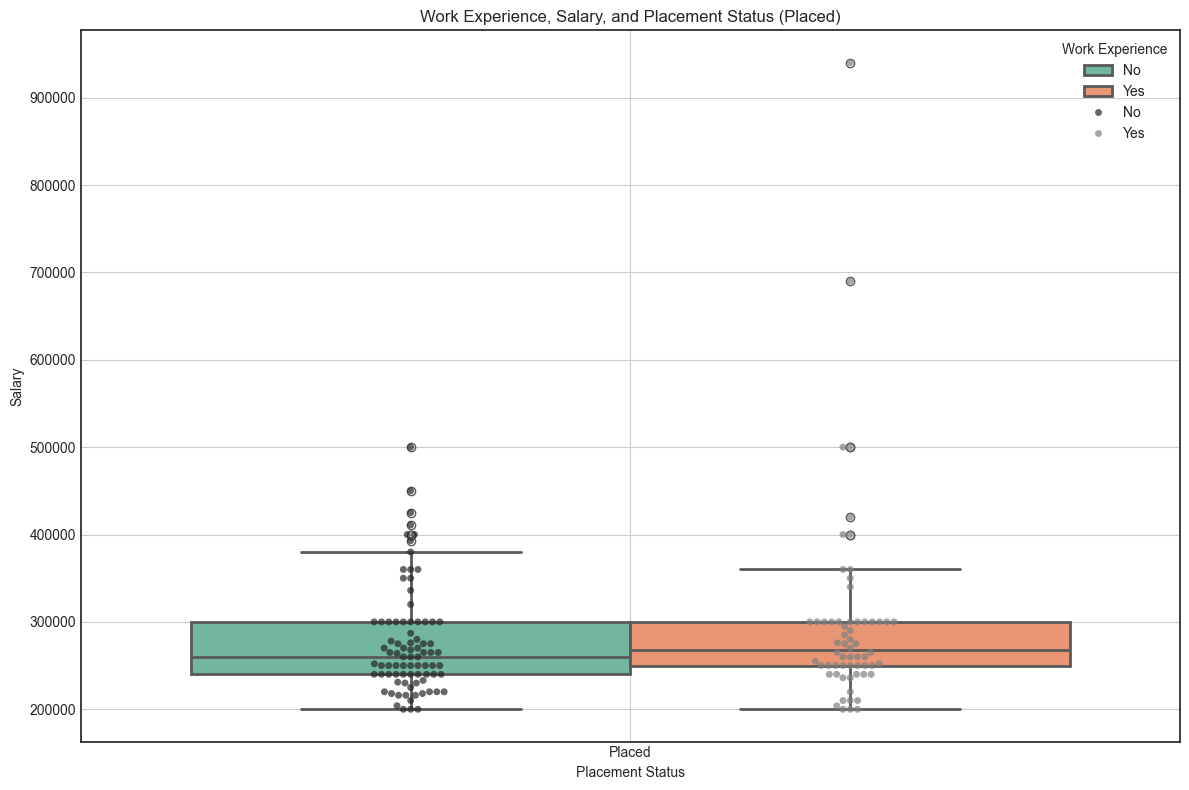

In [95]:
# Filter only 'Placed' status
df_placed = df[df['status'] == 'Placed']

# Plotting
plt.figure(figsize=(12, 8))

# Box plot with swarm plot overlay for 'Placed' status
sns.boxplot(x='status', y='salary', hue='workex', data=df_placed, palette='Set2', linewidth=2)
sns.swarmplot(x='status', y='salary', hue='workex', data=df_placed, dodge=True, palette='dark:grey', alpha=0.7)

# Customize plot
plt.title('Work Experience, Salary, and Placement Status (Placed)')
plt.xlabel('Placement Status')
plt.ylabel('Salary')
plt.legend(title='Work Experience', loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

#### A student which has work experience has almost equal salary which doesn't has any no experience.

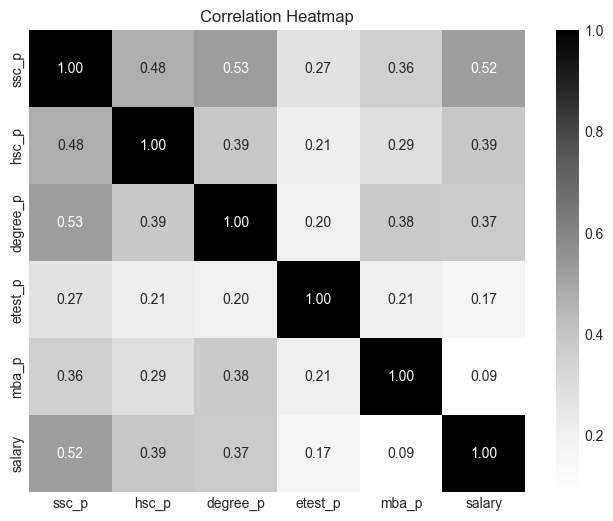

In [96]:
# Exclude non-numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=np.number).columns
corr_df = df[numeric_cols].corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='Greys')
plt.title('Correlation Heatmap')
plt.show()

#### No multicollinearity could be seen.

## Data Engineering

In [97]:
from sklearn.preprocessing import LabelEncoder
# Columns to encode
columns_to_encode = ['gender','workex', 'specialisation', 'status']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [98]:
dummy_hsc_s=pd.get_dummies(df['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(df['degree_t'], prefix='dummy')
df = pd.concat([df,dummy_hsc_s,dummy_degree_t],axis=1)
df.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


In [99]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


#### I am also planning to normalize the data as some models can be affect by it and can provide the preference to the data which has higher value.

In [100]:
# from sklearn.preprocessing import StandardScaler
# # Columns to normalize (excluding binary categorical columns)
# columns_to_normalize = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the data
# df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [101]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


#### I am also dropping some columns which are not useful for my analysis.

In [102]:
df.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

## Split the data

In [103]:
# split the data into two parts
X=df.drop('status',axis=1)
y=df['status']

In [104]:
# split into train & test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Build the model by using voting classifier

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [106]:
classifiers = [['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

LogisticRegression : 0.8412698412698413
DecisionTree : 0.7936507936507936
RandomForest : 0.8253968253968254


LogisticRegression : Accuracy: 0.8413
LogisticRegression : Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.84      0.93      0.88        41

    accuracy                           0.84        63
   macro avg       0.84      0.80      0.82        63
weighted avg       0.84      0.84      0.84        63

----------------------------------------
DecisionTree : Accuracy: 0.7937
DecisionTree : Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.80      0.90      0.85        41

    accuracy                           0.79        63
   macro avg       0.78      0.75      0.76        63
weighted avg       0.79      0.79      0.79        63

----------------------------------------
RandomForest : Accuracy: 0.8095
RandomForest : Classification Report:
              precision    recall  f1-scor

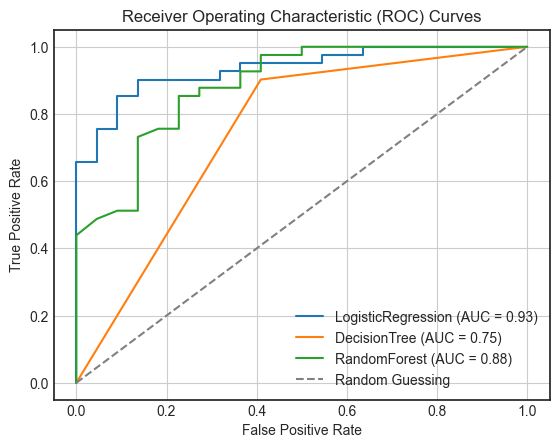

In [107]:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Calculate and print classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, predictions))
    print("----------------------------------------")

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name.strip(" :")} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [108]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(max_iter = 1000)
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
eclf1 = VotingClassifier(estimators=[('LR', clf1), ('DT', clf2), ('RF', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.55      0.69        22
           1       0.80      0.98      0.88        41

    accuracy                           0.83        63
   macro avg       0.86      0.76      0.78        63
weighted avg       0.84      0.83      0.81        63



In [109]:
eclf2 = VotingClassifier(estimators=[('LR', clf1), ('DT', clf2), ('RF', clf3)], voting='hard')
eclf2.fit(X_train, y_train)
predictions = eclf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63        22
           1       0.78      0.95      0.86        41

    accuracy                           0.79        63
   macro avg       0.81      0.73      0.74        63
weighted avg       0.80      0.79      0.78        63



In [110]:
from sklearn.model_selection import cross_val_score
c = []
c.append(cross_val_score(clf1,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf2,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf3,X_train,y_train,scoring='accuracy',cv=10).mean())
print(c)

[0.8590476190476191, 0.7838095238095237, 0.8395238095238096]


In [111]:
from sklearn.model_selection import GridSearchCV
# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Define base classifiers
clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()

# Parameter grids for each classifier
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for each classifier
grid_search_lr = GridSearchCV(estimator=clf1, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_dt = GridSearchCV(estimator=clf2, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_rf = GridSearchCV(estimator=clf3, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to data for each classifier
grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best score for each classifier
print("Logistic Regression - Best Parameters: ", grid_search_lr.best_params_)
print("Logistic Regression - Best Score: ", grid_search_lr.best_score_)
print()
print("Decision Tree - Best Parameters: ", grid_search_dt.best_params_)
print("Decision Tree - Best Score: ", grid_search_dt.best_score_)
print()
print("Random Forest - Best Parameters: ", grid_search_rf.best_params_)
print("Random Forest - Best Score: ", grid_search_rf.best_score_)




Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Logistic Regression - Best Parameters:  {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression - Best Score:  0.8472906403940886

Decision Tree - Best Parameters:  {'max_depth': 20, 'min_samples_split': 5}
Decision Tree - Best Score:  0.7704433497536947

Random Forest - Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Best Score:  0.8682266009852218


#### As hyperparameter is done, a change can be seen in the percentage of Random Forest.Also, Logistic Regression is performing well before.